# 3.3 matplotlib과 seaborn을 이용한 데이터 시각화

3.3.1 파이썬을 이용한 데이터 시각화

3.3.2 시각화를 위한 준비

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab\ Notebooks/StatisticsWithPython/data/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/StatisticsWithPython/data


In [2]:
import numpy as np
import pandas as pd

%precision 3

# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

3.3.3 pyplot을 이용한 꺾은선 그래프

In [3]:
# x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x = np.array([i for i in range(10)])
y = np.array([2, 3, 4, 4, 5, 4, 6, 7, 4, 8])

print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[2 3 4 4 5 4 6 7 4 8]


Text(0, 0.5, 'y')

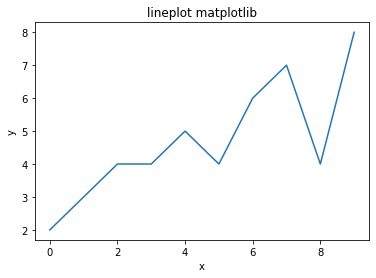

In [4]:
plt.plot(x, y)
plt.title("lineplot matplotlib")
plt.xlabel("x")
plt.ylabel("y")

# directory: data
# plt.savefig("lineplot matplotlib")

3.3.5 seaborn을 이용한 히스토그램

In [5]:
fish_data = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])
print(fish_data)

[2 3 3 4 4 4 4 5 5 6]


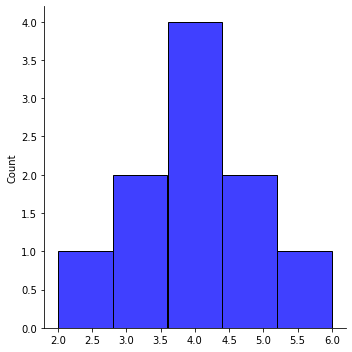

In [6]:
# sns.distplot(fish_data, bins=5, color='black', kde=False)
sns.displot(fish_data, bins=5, color='blue', kde=False)

3.3.6 커널밀도추정에 따른 히스토그램 평활화 - kernel density estimation 숙제

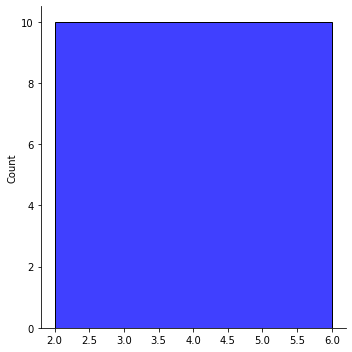

In [7]:
sns.displot(fish_data, bins=1, color='blue', kde=False)

distplot


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


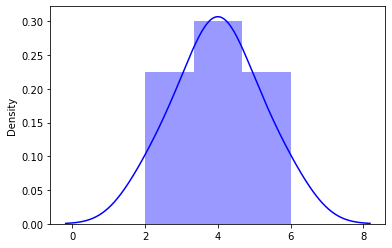

In [8]:
print("distplot")
sns.distplot(fish_data, color='blue')

displot


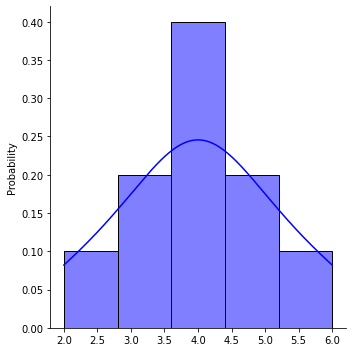

In [9]:
print("displot")
sns.displot(fish_data, color='blue', stat="probability", kde=True)

3.3.7 2변량 데이터에 대한 히스토그램

In [10]:
fish_multi = pd.read_csv("3-3-2-fish_multi_2.csv")
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A       4
6        A       4
7        A       5
8        A       5
9        A       6
10       B       5
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


In [11]:
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [12]:
length_a = fish_multi.query("species == 'A'")["length"]
length_b = fish_multi.query("species == 'B'")["length"]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


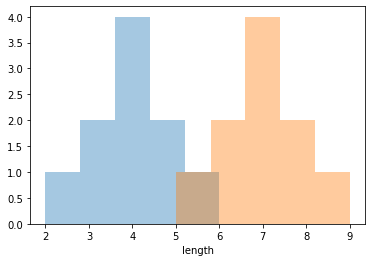

In [13]:
sns.distplot(length_a, bins=5, kde=False)
sns.distplot(length_b, bins=5, kde=False)

In [14]:
# sns.displot(length_a, bins=5, color='black', kde=False)
# sns.displot(length_b, bins=5, color='gray', kde=False)
# print(length_data)

3.3.8 다변량 데이터를 시각화하는 코드 작성

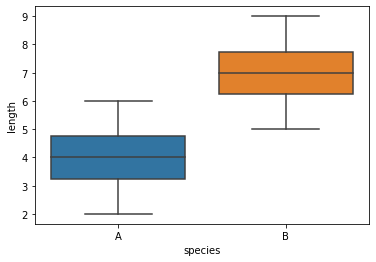

In [15]:
sns.boxplot(x="species", y="length", data=fish_multi)

3.3.10 바이올린플롯

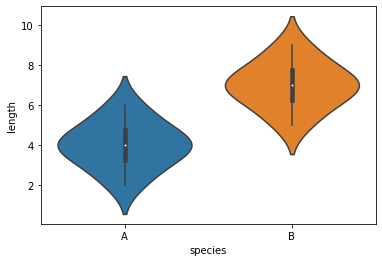

In [16]:
sns.violinplot(x="species", y="length", data=fish_multi)

3.3.11 막대그래프

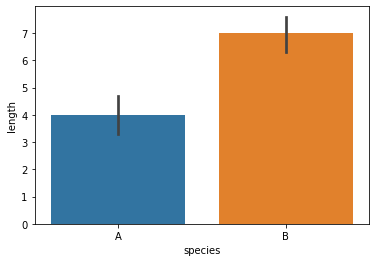

In [17]:
sns.barplot(x="species", y="length", data=fish_multi)

3.3.12 산포도

In [18]:
cov_data = pd.read_csv("3-2-3-cov.csv")
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


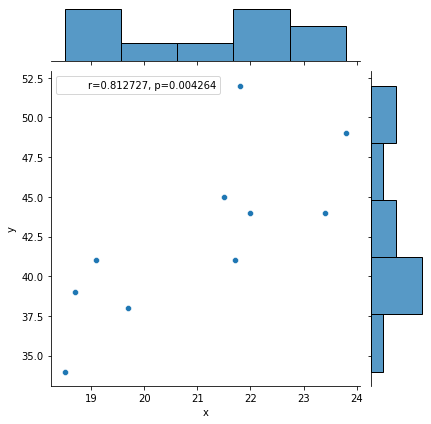

In [19]:
# pearson
import scipy.stats as stats

graph = sns.jointplot(x='x', y='y', data=cov_data)
r, p = stats.pearsonr(x, y)

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],[f'r={r:f}, p={p:f}'])

3.3.13 페어플롯

In [20]:
iris = sns.load_dataset("iris")
iris.head(n=3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [21]:
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


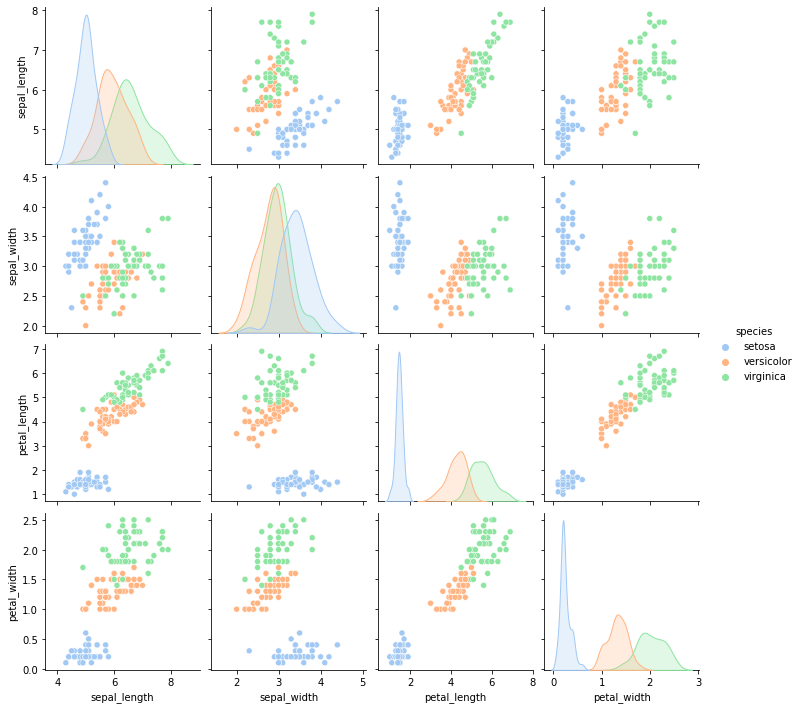

In [22]:
sns.pairplot(iris, hue="species", palette="pastel")

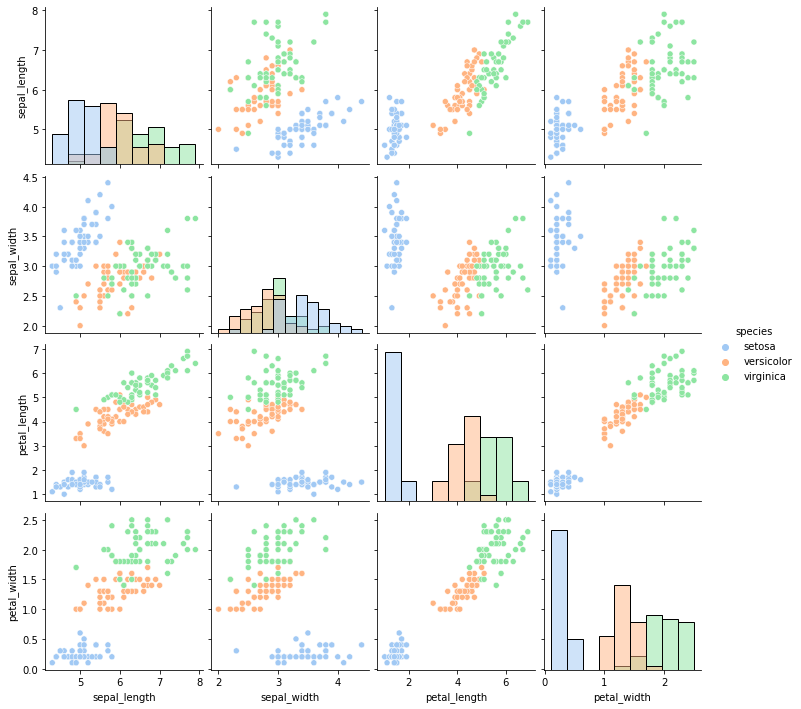

In [23]:
sns.pairplot(iris, hue="species", palette="pastel", diag_kind="hist")

참고문헌: 

[1] 파이썬으로 배우는 통계학 교과서; 바바 신야 지음, 윤옹식 옮김; 한빛미디어 (2020)